In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 320, 240

# load the model we saved
model = load_model('/content/drive/MyDrive/cv img det/hand_gesture_recognition.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


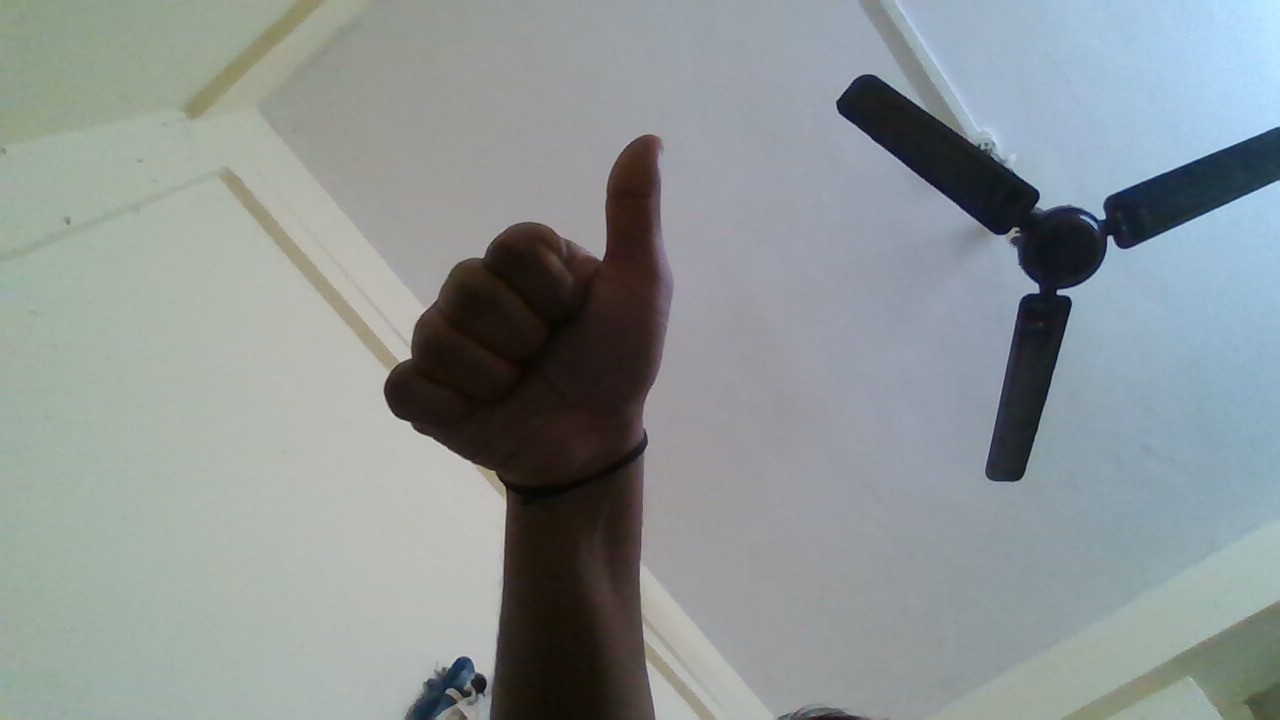

In [ ]:
img = cv2.imread('/content/drive/MyDrive/cv img det/WIN_20221210_23_16_00_Pro.jpg',cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

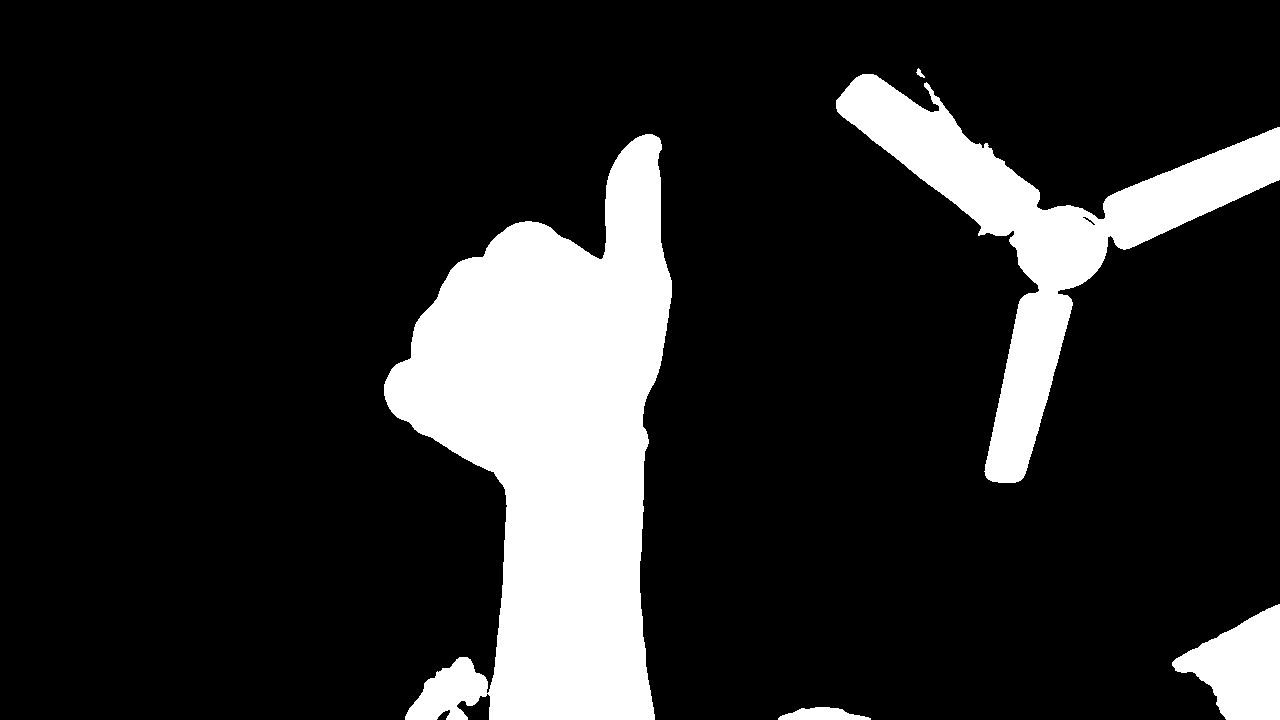

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (7, 7), 0)
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
imagem = cv2.bitwise_not(bw_img)
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step
Input image represents:Five


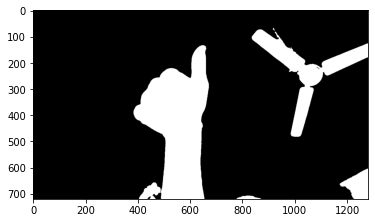

In [ ]:
in_img=[]
image=imagem
# image=np.array(image)
original=image
image = cv2.resize(image,(100, 120))
in_img.append(image)
img = np.asarray(in_img)
img=img.reshape(img.shape[0], 100, 120, 1)
pred=np.argmax(model.predict(img))
# print(pred)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
if pred==0:
  print("Input image represents :Blank")
elif(pred==1):
  print("Input image represents:OK")
elif pred==2:
  print("Input image represents :Thumbs up")
elif(pred==4):
  print("Input image represents :Fist")
elif(pred==5):
  print("Input image represents:Five")
else :
  print("Input image represents:Thumbs Down")


In [24]:
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install -q streamlit

In [26]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/MyDrive/cv img det/hand_gesture_recognition.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         #Hand Sign Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (100,120)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    img = np.array(Image.open(file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (7, 7), 0)
    ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    # converting to its binary form
    bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img = cv2.bitwise_not(bw_img)
    st.image(img, use_column_width=True)
    predictions = import_and_predict(img, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.py


In [27]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [28]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!ngrok authtoken 2IjXOgEokMCKLShRXQIqqolpSwh_2kt8waG4jQhpXD8Z3LWks

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url


INFO:pyngrok.process:t=2022-12-10T19:31:47+0000 lvl=info msg=start pg=/api/tunnels id=4d663aa574a2cc6f

2022-12-10 19:31:47.895 t=2022-12-10T19:31:47+0000 lvl=info msg=start pg=/api/tunnels id=4d663aa574a2cc6f


2022-12-10 19:31:48.011 t=2022-12-10T19:31:48+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=4d663aa574a2cc6f err=EOF

INFO:pyngrok.process:t=2022-12-10T19:31:48+0000 lvl=info msg=end pg=/api/tunnels id=4d663aa574a2cc6f status=502 dur=115.944848ms

2022-12-10 19:31:48.025 t=2022-12-10T19:31:48+0000 lvl=info msg=end pg=/api/tunnels id=4d663aa574a2cc6f status=502 dur=115.944848ms



PyngrokNgrokHTTPError: ignored

In [36]:
!cat nohup.out




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.132.249.127:8502

  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.249.127:8501

  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.249.127:8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.132.249.127:8502

  Stopping...
  Stopping...



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.132.249.127:8501

2022-12-10 18:51:09.031401: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-10 18:51:19.803 Uncaught app exception
Traceback (most recent ca